Importing libraries and datset

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
df = pd.read_csv('covid.csv')
df

,age,sex,country_new,chronic_disease,date_onset_symptoms,date_confirmation,date_discharged_or_discharged,outcome,Fever,Cough,Fatigue,Sore throat,Runny nose,Shortness of breath,Vomiting,full_symptoms
0,60.0,male,Japan,NaN,03.02.2020,18.02.2020,NaN,Receiving Treatment,1,0,0,0,0,0,0,"fever, severe pneumonia"
1,45.0,male,Japan,NaN,08.02.2020,10.02.2020,NaN,discharged,1,0,0,0,0,0,0,fever
2,25.0,male,Japan,NaN,07.02.2020,08.02.2020,NaN,Receiving Treatment,1,1,0,1,0,0,0,"cough, fever, sore throat"
3,45.0,male,Japan,NaN,02.02.2020,15.02.2020,NaN,Receiving Treatment,1,1,0,0,0,0,0,"cough, fever"
4,85.0,male,Japan,NaN,09.02.2020,18.02.2020,NaN,Receiving Treatment,1,0,0,0,0,1,0,"dyspnea, fever"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,65.0,male,Canada,NaN,NaN,29.02.2020,NaN,Receiving Treatment,0,1,0,0,0,0,0,cough
1449,45.0,male,Canada,NaN,NaN,19.03.2020,NaN,Receiving Treatment,0,0,0,0,0,0,0,mild
1450,35.0,male,United States,hypertriglyceridemia,16.01.2020,20.01.2020,NaN,Receiving Treatment,1,1,0,0,0,0,1,"cough, fever, nausea"
1451,65.0,male,Canada,NaN,NaN,01.03.2020,NaN,Receiving Treatment,0,1,0,0,0,0,0,cough


Check which columns have null values

In [ ]:
df.isna().sum()

,0
age,0
sex,0
country_new,260
chronic_disease,1332
date_onset_symptoms,293
date_confirmation,37
date_discharged_or_discharged,1263
outcome,0
Fever,0
Cough,0


Creating smaller dataset containing features we're interested in

In [ ]:
x = df[['age' ,'sex', 'Fever' , 'Cough' , 'Fatigue' , 'Sore throat' , 'Runny nose' , 'Shortness of breath' , 'Vomiting']]
x

,age,sex,Fever,Cough,Fatigue,Sore throat,Runny nose,Shortness of breath,Vomiting
0,60.0,male,1,0,0,0,0,0,0
1,45.0,male,1,0,0,0,0,0,0
2,25.0,male,1,1,0,1,0,0,0
3,45.0,male,1,1,0,0,0,0,0
4,85.0,male,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1448,65.0,male,0,1,0,0,0,0,0
1449,45.0,male,0,0,0,0,0,0,0
1450,35.0,male,1,1,0,0,0,0,1
1451,65.0,male,0,1,0,0,0,0,0


In [ ]:
x.isna().sum()

,0
age,0
sex,0
Fever,0
Cough,0
Fatigue,0
Sore throat,0
Runny nose,0
Shortness of breath,0
Vomiting,0


Check datatypes of features

In [ ]:
x.dtypes

,0
age,float64
sex,object
Fever,int64
Cough,int64
Fatigue,int64
Sore throat,int64
Runny nose,int64
Shortness of breath,int64
Vomiting,int64


Data Encoding: Coding Male as 1 and Female as 0 so that Naive Bayes algorithm can be implemented. This is necessary as the classifier only works on numerical values.

In [ ]:
x['gender'] = x['sex'].map({'male':1,'female':0})
x

<ipython-input-12-0c3491d90dbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['gender'] = x['sex'].map({'male':1,'female':0})


,age,sex,Fever,Cough,Fatigue,Sore throat,Runny nose,Shortness of breath,Vomiting,gender
0,60.0,male,1,0,0,0,0,0,0,1
1,45.0,male,1,0,0,0,0,0,0,1
2,25.0,male,1,1,0,1,0,0,0,1
3,45.0,male,1,1,0,0,0,0,0,1
4,85.0,male,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1448,65.0,male,0,1,0,0,0,0,0,1
1449,45.0,male,0,0,0,0,0,0,0,1
1450,35.0,male,1,1,0,0,0,0,1,1
1451,65.0,male,0,1,0,0,0,0,0,1


Drop redundant column "sex" as "gender will now be used.

In [ ]:
x = x.drop('sex',axis='columns')
x

,age,Fever,Cough,Fatigue,Sore throat,Runny nose,Shortness of breath,Vomiting,gender
0,60.0,1,0,0,0,0,0,0,1
1,45.0,1,0,0,0,0,0,0,1
2,25.0,1,1,0,1,0,0,0,1
3,45.0,1,1,0,0,0,0,0,1
4,85.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1448,65.0,0,1,0,0,0,0,0,1
1449,45.0,0,0,0,0,0,0,0,1
1450,35.0,1,1,0,0,0,0,1,1
1451,65.0,0,1,0,0,0,0,0,1


Dataframe that represents outcome of each patient, "y". This is also encoded to 1 and 0 for simplicity.

In [ ]:
y = df['outcome']
y = y.map({'Receiving Treatment':1,'discharged':0})
y

,outcome
0,1
1,0
2,1
3,1
4,1
...,...
1448,1
1449,1
1450,1
1451,1


Splitting of the dataset into training and testing datasets. Training dataset is always larger than testing dataset so that the model is trained well.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

Fitting the model on training dataset.

In [ ]:
clf = GaussianNB()
clf.fit(x_train,y_train) #train the model

GaussianNB()

In [ ]:
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.22      0.26       127
           1       0.72      0.82      0.76       309

    accuracy                           0.64       436
   macro avg       0.52      0.52      0.51       436
weighted avg       0.60      0.64      0.62       436



In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 28  99]
 [ 57 252]]


[Text(0.5, 1.0, 'Confusion Matrix for Patient Status'),
 Text(0.5, 0, 'Predicted Outcome'),
 Text(0, 0.5, 'Actual outcome')]

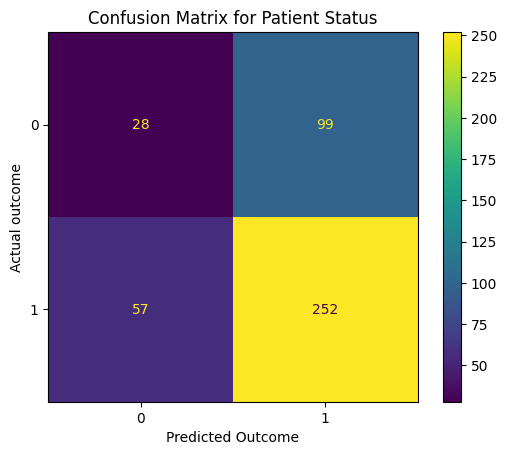

In [ ]:
cmd_obj = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
cmd_obj.plot()
cmd_obj.ax_.set(title = 'Confusion Matrix for Patient Status',xlabel = 'Predicted Outcome',ylabel = 'Actual outcome')